In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357286 sha256=c4fd507439c5b03372ce71202941658ea60df91854870a94ec5e7b44d8c06473
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [ ]:
cities_df=pd.read_excel('/content/City.xlsx')
continent_df=pd.read_excel('/content/Continent.xlsx')
countries_df=pd.read_excel('/content/Country.xlsx')
attractions_df=pd.read_excel('/content/Item.xlsx')
visit_modes_df=pd.read_excel('/content/Mode.xlsx')
regions_df=pd.read_excel('/content/Region.xlsx')
transactions_df=pd.read_excel('/content/Transaction.xlsx')



In [ ]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9143 entries, 0 to 9142
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityId     9143 non-null   int64 
 1   CityName   9142 non-null   object
 2   CountryId  9143 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 214.4+ KB


In [ ]:
continent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ContenentId  6 non-null      int64 
 1   Contenent    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CountryId  165 non-null    int64 
 1   Country    165 non-null    object
 2   RegionId   165 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [ ]:
attractions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AttractionId       30 non-null     int64 
 1   AttractionCityId   30 non-null     int64 
 2   AttractionTypeId   30 non-null     int64 
 3   Attraction         30 non-null     object
 4   AttractionAddress  30 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [ ]:
visit_modes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitModeId  6 non-null      int64 
 1   VisitMode    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [ ]:
regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Region     22 non-null     object
 1   RegionId   22 non-null     int64 
 2   ContentId  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [ ]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


In [ ]:
transactions_df.head()



,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


In [ ]:
cities_df

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3
...,...,...,...
9138,9138,Yeovil,163
9139,9139,York,163
9140,9140,Yorkshire,163
9141,9141,Zaandam,163


In [ ]:
visit_modes_df

,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends
5,5,Solo


In [ ]:
unique_cities_count = cities_df['CityId'].nunique()
print(f"\nTotal Unique Cities: {unique_cities_count}")

unique_attractions_count = attractions_df['AttractionId'].nunique()
print(f"Total Unique Attractions: {unique_attractions_count}")


unique_countries_count = countries_df['CountryId'].nunique()
print(f"Total Unique Countries: {unique_countries_count}")


unique_visit_modes_count = visit_modes_df['VisitModeId'].nunique()
print(f"Total Unique Visit Modes: {unique_visit_modes_count}")


print("\nMissing Values in Each DataFrame:")
print("Cities:", cities_df.isnull().sum())
print("Continent:", continent_df.isnull().sum())
print("Countries:", countries_df.isnull().sum())
print("Attractions:", attractions_df.isnull().sum())
print("Visit Modes:", visit_modes_df.isnull().sum())
print("Regions:", regions_df.isnull().sum())
print("Transactions:", transactions_df.isnull().sum())


Total Unique Cities: 9143
Total Unique Attractions: 30
Total Unique Countries: 165
Total Unique Visit Modes: 6

Missing Values in Each DataFrame:
Cities: CityId       0
CityName     1
CountryId    0
dtype: int64
Continent: ContenentId    0
Contenent      0
dtype: int64
Countries: CountryId    0
Country      0
RegionId     0
dtype: int64
Attractions: AttractionId         0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
dtype: int64
Visit Modes: VisitModeId    0
VisitMode      0
dtype: int64
Regions: Region       0
RegionId     0
ContentId    0
dtype: int64
Transactions: TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64


<ipython-input-17-3c7170eb45aa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=transactions_df, palette='viridis')


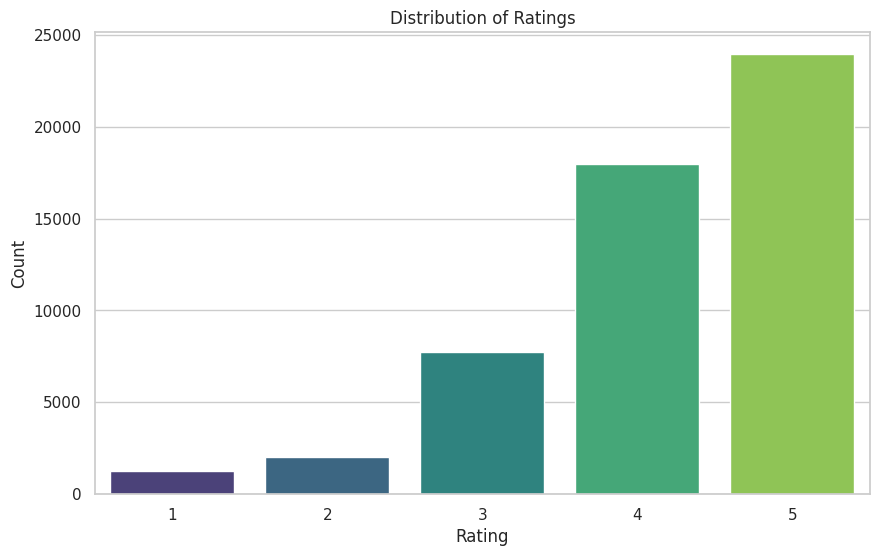

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

# Visualizing the distribution of ratings in transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=transactions_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



In [ ]:
# Creating a Utility Matrix
# Create a utility matrix where rows are UserId and columns are AttractionId
utility_matrix = transactions_df.pivot_table(index='UserId', columns='AttractionId', values='Rating')

# Display the utility matrix
print("\nUtility Matrix:")
print(utility_matrix.head())




Utility Matrix:
AttractionId  369   481   640   650   673   737   748   749   824   841   ...  \
UserId                                                                    ...   
14             NaN   NaN  4.00   NaN   NaN   NaN   5.0   NaN   NaN   NaN  ...   
16             NaN   5.0  4.25   NaN   NaN   NaN   5.0   NaN   5.0   5.0  ...   
20             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.0  ...   
23             NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN   NaN   NaN  ...   
25             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

AttractionId  1133  1137  1166  1171  1220  1225  1238  1278  1280  1297  
UserId                                                                    
14             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
16             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
20             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
23             NaN   NaN   NaN   NaN   N

In [ ]:
utility_matrix.fillna(0, inplace=True)


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_utility = scaler.fit_transform(utility_matrix)

#Implementing Basic Recommendation Logic
def recommend_attractions(user_id, utility_matrix, num_recommendations=5):
    # Get the ratings of the specified user
    user_ratings = utility_matrix.loc[user_id]

    unrated_attractions = user_ratings[user_ratings == 0]

    # Calculate the average ratings for unrated attractions
    recommendations = utility_matrix.mean(axis=0)[unrated_attractions.index]

    # Sort the recommendations
    top_recommendations = recommendations.sort_values(ascending=False).head(num_recommendations)

    return top_recommendations




In [ ]:
user_id_example = transactions_df['UserId'].sample(1).values[0]  # Randomly select a user ID
recommended_attractions = recommend_attractions(user_id_example, utility_matrix)

print(f"\nRecommended Attractions for User {user_id_example}:")
print(recommended_attractions)


Recommended Attractions for User 4885:
AttractionId
748    0.671355
824    0.400301
737    0.395178
650    0.332434
673    0.312474
dtype: float64


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
attractions_df['Feature'] = attractions_df['AttractionTypeId'].astype(str) + ' ' + attractions_df['AttractionAddress']

# Compute Similarities

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(attractions_df['Feature'])

# Compute cosine similarity matrix based on the feature matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)


cosine_sim_df = pd.DataFrame(cosine_sim, index=attractions_df['AttractionId'], columns=attractions_df['AttractionId'])


In [ ]:

# Combine Recommendations
def hybrid_recommendations(user_id, utility_matrix, cosine_sim_df, num_recommendations=5):
    # Get collaborative recommendations
    collab_recommendations = recommend_attractions(user_id, utility_matrix, num_recommendations)

    # Get content-based recommendations
    content_based_recommendations = pd.Series(dtype=float)


    for attraction_id in collab_recommendations.index:

        sim_scores = cosine_sim_df[attraction_id]

        # Sort attractions by similarity scores
        sorted_sim_scores = sim_scores.sort_values(ascending=False)

        # Get the top attractions, excluding the current attraction
        top_similar_attractions = sorted_sim_scores[sorted_sim_scores.index != attraction_id].head(num_recommendations)

        content_based_recommendations = pd.concat([content_based_recommendations, top_similar_attractions])


    combined_recommendations = (collab_recommendations.add(content_based_recommendations.groupby(content_based_recommendations.index).sum(), fill_value=0))


    top_combined_recommendations = combined_recommendations.sort_values(ascending=False).head(num_recommendations)

    return top_combined_recommendations





In [ ]:
attraction_mapping = attractions_df.set_index('AttractionId')['Attraction']



In [ ]:
def interactive_recommendation():
    while True:
        user_input = input("Enter User ID for recommendations (type 'NA' to quit): ")

        if user_input.strip().upper() == "NA":
            print("Exiting the recommendation system.")
            break

        try:
            user_id = int(user_input)


            hybrid_recommended_attractions = hybrid_recommendations(user_id, utility_matrix, cosine_sim_df)


            recommended_attractions_with_names = hybrid_recommended_attractions.index.map(attraction_mapping)


            recommendations_with_scores = pd.DataFrame({
                'Attraction': recommended_attractions_with_names,
                'Score': hybrid_recommended_attractions.values
            })


            print(f"\nHybrid Recommended Attractions for User {user_id}:")
            print(recommendations_with_scores)

        except ValueError:
            print("Invalid input. Please enter a valid User ID or type 'NA' to quit.")


interactive_recommendation()


Enter User ID for recommendations (type 'NA' to quit): 79069

Hybrid Recommended Attractions for User 79069:
                 Attraction     Score
0            Uluwatu Temple  1.183304
1             Waterbom Bali  1.118731
2  Water Castle (Tamansari)  1.103917
3   Tegalalang Rice Terrace  0.899276
4      Tegenungan Waterfall  0.587062
Enter User ID for recommendations (type 'NA' to quit): NA
Exiting the recommendation system.


In [ ]:
import pickle


model_data = {
    'utility_matrix': utility_matrix,
    'cosine_sim_df': cosine_sim_df,
    'attraction_mapping': attraction_mapping
}


with open('tourism_recommendation_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model data has been saved to 'recommendation_model.pkl'.")


Model data has been saved to 'recommendation_model.pkl'.
